# ARIMA Model 

### Add Project directory to system path

In [1]:
import os
import warnings
warnings.filterwarnings("ignore")
notebook_dir = os.getcwd()
parent_path=os.path.dirname(notebook_dir)

os.chdir(parent_path)

### Load Module

In [2]:
from script.ARIMA_model import Modelling
modelling=Modelling()

### Load Stoke Price Data

In [20]:
import pandas as pd
stoke_data=pd.read_csv("data/stoke_data.csv")

## **Modelling For Tesla(TSLA) Stock Price**

### **Check Stationarity**

In [4]:
modelling.check_stationarity(stoke_data,'TSLA')

2024-11-11 14:20:15,989 - INFO - Stationarity of the time series data is checked.


Test Statistics: -1.1507672706146044
p-Value: 0.6944080657685303
Lag used: 27
Number of observation: 27
Critical Values': {'1%': np.float64(-3.433026277967909), '5%': np.float64(-2.862722353917318), '10%': np.float64(-2.56739941472018)}
Conclusion: Non-Stationary


### **Train-Test Split**

In [5]:
train,test=modelling.train_test_split(stoke_data,'TSLA')

2024-11-11 14:20:16,016 - INFO - Train-Test split is done with a ratio of 0.8.


### **Grid Search p,q and d parameters**

In [6]:
best_params=modelling.grid_search(train)

2024-11-11 14:21:50,437 - INFO - Grid search is use to find the best orders of the ARIMA model.


Best ARIMA parameters: (2, 1, 3)


### **Train with ARIMA model**

In [7]:
forecast=modelling.arima_train(train,test,best_params)

2024-11-11 14:21:52,418 - INFO - The best orders are used to fit the ARIMA model.


### **Evaluate**

In [8]:
modelling.evaluate_arima_model(test,forecast)

2024-11-11 14:21:52,437 - INFO - Evaluatio Metrics to assses the performance of the model.


Mean Absolute Error (MAE): 38.70688663402304
Mean Squared Error (MSE): 2389.3652003374646
Root Mean Squared Error (RMSE): 48.881133378200886
R Square Score (r2_score): -0.6027045088243332
Mean Absolute Percentage Error (MAPE): 17.536726022187462 %


### **Plot Result**

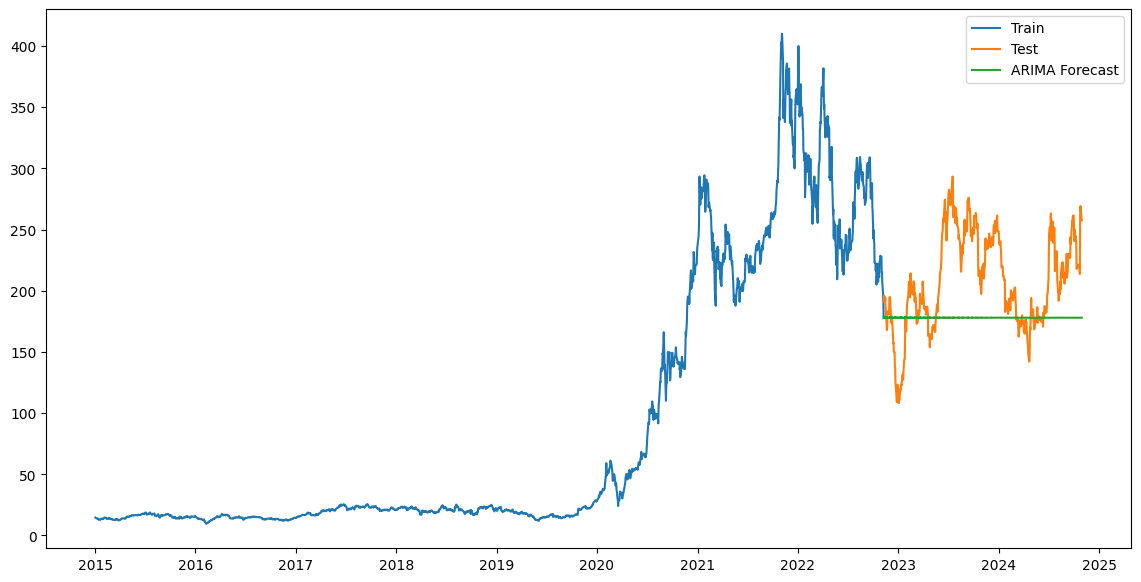

2024-11-11 14:21:52,867 - INFO - Plot of the resulting prediction.


In [ ]:
modelling.plot_result('TSLA',train,test,forecast)

## **Modelling For Vanguard Total Bond Market ETF (BND) Stock Price**

### **Check Stationarity**

In [13]:
modelling.check_stationarity(stoke_data,'BND')

2024-11-11 14:38:49,147 - INFO - Stationarity of the time series data is checked.


Test Statistics: -0.8164742995386136
p-Value: 0.8142349053641602
Lag used: 13
Number of observation: 13
Critical Values': {'1%': np.float64(-3.4330110311801567), '5%': np.float64(-2.862715621038473), '10%': np.float64(-2.5673958300284223)}
Conclusion: Non-Stationary


### **Train-Test Split**

In [14]:
train,test=modelling.train_test_split(stoke_data,'BND')

2024-11-11 14:38:52,512 - INFO - Train-Test split is done with a ratio of 0.8.


### **Grid Search p,q and d parameters**

In [15]:
best_params=modelling.grid_search(train)

2024-11-11 14:41:05,408 - INFO - Grid search is use to find the best orders of the ARIMA model.


Best ARIMA parameters: (4, 1, 4)


### **Train with ARIMA model**

In [16]:
forecast=modelling.arima_train(train,test,best_params)

2024-11-11 14:43:14,277 - INFO - The best orders are used to fit the ARIMA model.


### **Evaluate**

In [17]:
modelling.evaluate_arima_model(test,forecast)

2024-11-11 14:43:24,560 - INFO - Evaluatio Metrics to assses the performance of the model.


Mean Absolute Error (MAE): 2.577512590040589
Mean Squared Error (MSE): 8.162039759299141
Root Mean Squared Error (RMSE): 2.8569283783985804
R Square Score (r2_score): -2.8249572343580462
Mean Absolute Percentage Error (MAPE): 3.5267683599151236 %


### **Plot Result**

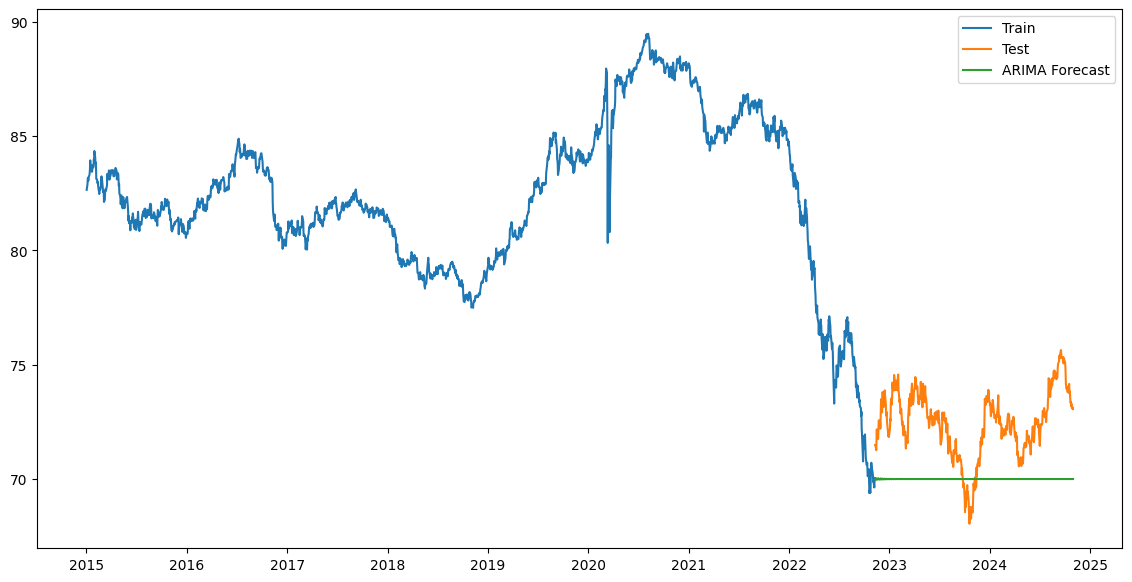

2024-11-11 14:44:14,284 - INFO - Plot of the resulting prediction.


In [19]:
modelling.plot_result(train,test,forecast)

## **Modelling For S&P 500 ETF (SPY) Stock Price**

### **Check Stationarity**

In [21]:
modelling.check_stationarity(stoke_data,'SPY')

2024-11-11 14:48:21,798 - INFO - Stationarity of the time series data is checked.


Test Statistics: 0.7298432272822041
p-Value: 0.9904150070128018
Lag used: 27
Number of observation: 27
Critical Values': {'1%': np.float64(-3.433026277967909), '5%': np.float64(-2.862722353917318), '10%': np.float64(-2.56739941472018)}
Conclusion: Non-Stationary


### **Train-Test Split**

In [22]:
train,test=modelling.train_test_split(stoke_data,'SPY')

2024-11-11 14:48:28,046 - INFO - Train-Test split is done with a ratio of 0.8.


### **Grid Search p,q and d parameters**

In [23]:
best_params=modelling.grid_search(train)

2024-11-11 14:51:18,514 - INFO - Grid search is use to find the best orders of the ARIMA model.


Best ARIMA parameters: (4, 1, 4)


### **Train with ARIMA model**

In [24]:
forecast=modelling.arima_train(train,test,best_params)

2024-11-11 14:52:19,135 - INFO - The best orders are used to fit the ARIMA model.


### **Evaluate**

In [25]:
modelling.evaluate_arima_model(test,forecast)

2024-11-11 14:52:23,043 - INFO - Evaluatio Metrics to assses the performance of the model.


Mean Absolute Error (MAE): 94.75457603587307
Mean Squared Error (MSE): 12528.405163809097
Root Mean Squared Error (RMSE): 111.93035854409248
R Square Score (r2_score): -2.530123404733862
Mean Absolute Percentage Error (MAPE): 18.94370787851876 %


### **Plot Result**

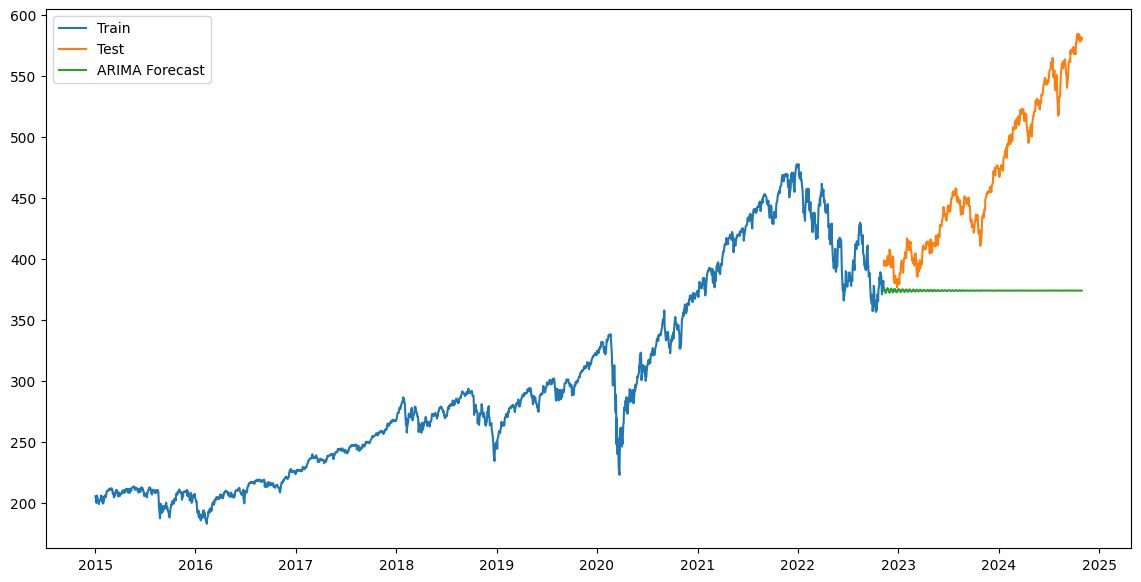

2024-11-11 14:52:36,632 - INFO - Plot of the resulting prediction.


In [ ]:
modelling.plot_result(train,test,forecast)